# Market Basket Analysis

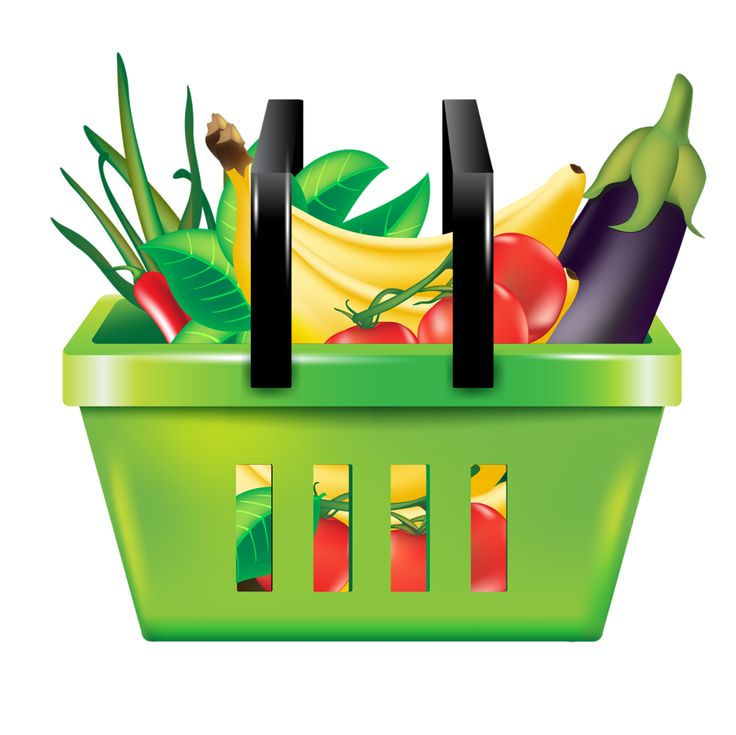

In [3]:
from IPython.display import Image
Image(filename = 'download.jpg' , width = 400 , height = 200) 


In [4]:
pwd()

'C:\\Users\\NAMAN AGRAWAL\\Downloads'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\NAMAN AGRAWAL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
gr = pd.read_csv("groceries.csv" , sep='\t' , header=None)

In [7]:
gr.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [8]:
gr.shape

(9835, 1)

In [9]:
gr.rename(columns = {0:"Items"} , inplace=True)

In [10]:
gr.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [11]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 1 columns):
Items    9835 non-null object
dtypes: object(1)
memory usage: 77.0+ KB


In [12]:
gr.describe()

,Items
count,9835
unique,7011
top,canned beer
freq,260


In [13]:
gr['Items'] = gr['Items'].apply(lambda row:row.split(','))
gr.head()


,Items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [14]:
gr['Total Items'] = gr['Items'].apply(len)
gr.head()

,Items,Total Items
0,"[citrus fruit, semi-finished bread, margarine,...",4
1,"[tropical fruit, yogurt, coffee]",3
2,[whole milk],1
3,"[pip fruit, yogurt, cream cheese, meat spreads]",4
4,"[other vegetables, whole milk, condensed milk,...",4


In [15]:
gr['Total Items'].value_counts()

1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
28       1
32       1
24       1
27       1
Name: Total Items, dtype: int64

In [16]:
gr_2_or_more = [x for x in gr['Items'] if len(x) >= 2]

In [17]:
len(gr_2_or_more)

7676

In [18]:
type(gr_2_or_more)
gr_2_or_more[3:6]

[['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)']]

In [19]:
gr.drop(['Total Items'] , inplace=True , axis=1)

In [20]:
gr

,Items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [21]:
gr_full = gr.explode('Items')
gr.head()
#gr_full.head(20)


,Items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [22]:
gr_full.head(20)

,Items
0,citrus fruit
0,semi-finished bread
0,margarine
0,ready soups
1,tropical fruit
1,yogurt
1,coffee
2,whole milk
3,pip fruit
3,yogurt


In [23]:
gr_full['Items'].value_counts()

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
kitchen utensil             4
bags                        4
preservation products       2
baby food                   1
sound storage medium        1
Name: Items, Length: 169, dtype: int64

Text(0, 0.5, 'Occurrence')

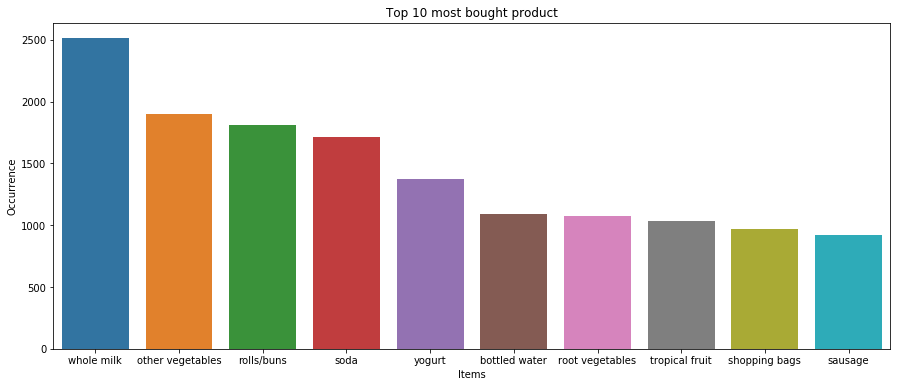

In [24]:
plt.figure(figsize = (15,6))
plt.title('Top 10 most bought product')
plot = sns.barplot(x=gr_full['Items'].value_counts().head(10).index , y=gr_full['Items'].value_counts().head(10))
plt.xlabel('Items')
plt.ylabel('Occurrence')


Text(0, 0.5, 'Occurrence')

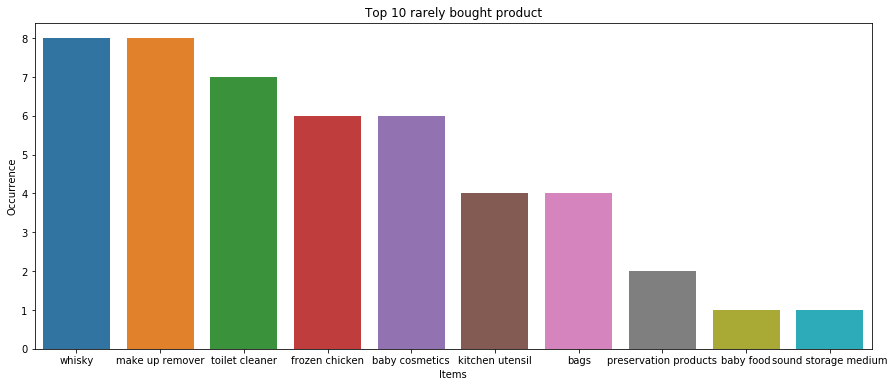

In [25]:
plt.figure(figsize = (15,6))
plt.title('Top 10 rarely bought product')
plot = sns.barplot(x=gr_full['Items'].value_counts().tail(10).index , y=gr_full['Items'].value_counts().tail(10))
plt.xlabel('Items')
plt.ylabel('Occurrence')


In [26]:
!pip install mlxtend


In [27]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(gr_2_or_more).transform(gr_2_or_more)

In [28]:
len(gr_2_or_more)

7676

In [29]:
gr_2_or_more

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['butter milk', 'pastry'],
 ['tropical fruit',
  'cream cheese',
  'processed cheese',
  'detergent',
  'newspapers'],
 ['tropical fruit',
  'root vegetables',
  'other vegetables',
  'frozen des

In [30]:
len(te_array)

7676

In [31]:
te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [35]:
transaction_group = pd.DataFrame(te_array , columns=te.columns_)
transaction_group.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,...,pickled vegetables,pip fruit,popcorn,pork,potato products,potted plants,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,Fal

In [36]:
from mlxtend.frequent_patterns import apriori

In [38]:
freq_itemsets = apriori(transaction_group , min_support = 0.01 , use_colnames = True , max_len=2)
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x:len(x))

In [39]:
freq_itemsets

,support,itemsets,length
0,0.041558,(UHT-milk),1
1,0.022277,(baking powder),1
2,0.063835,(beef),1
3,0.041298,(berries),1
4,0.029964,(beverages),1
...,...,...,...
410,0.041298,"(whipped/sour cream, whole milk)",2
411,0.026576,"(yogurt, whipped/sour cream)",2
412,0.021886,"(white bread, whole milk)",2
413,0.011595,"(yogurt, white bread)",2


In [40]:
from mlxtend.frequent_patterns import association_rules


In [41]:
rules = association_rules(freq_itemsets , metric="lift" , min_threshold = 1)

In [42]:
round(rules[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift' , 'leverage' , 'conviction']])

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(other vegetables),(UHT-milk),0.0,0.0,1.0,0.0,1.0
1,(UHT-milk),(other vegetables),0.0,0.0,1.0,0.0,1.0
2,(baking powder),(whole milk),0.0,1.0,2.0,0.0,1.0
3,(whole milk),(baking powder),0.0,0.0,2.0,0.0,1.0
4,(beef),(citrus fruit),0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...
527,(whole milk),(white bread),0.0,0.0,1.0,0.0,1.0
528,(yogurt),(white bread),0.0,0.0,1.0,0.0,1.0
529,(white bread),(yogurt),0.0,0.0,1.0,0.0,1.0
530,(yogurt),(whole milk),0.0,0.0,1.0,0.0,1.0
